# Telecom Churn Prediction - Exploratory Data Analysis

This notebook performs comprehensive EDA on the telecommunications churn dataset to understand customer behavior and identify key factors affecting churn.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load Dataset

In [2]:
df = pd.read_csv('telecommunications_churn.csv')
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset Shape: 3333 rows, 19 columns


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


## 3. Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

## 4. Missing Values Check

In [4]:
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print("Missing values per column:")
    print(missing_values[missing_values > 0])

✓ No missing values found in the dataset!


## 5. Statistical Summary

In [5]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


## 6. Target Variable Analysis (Churn)

Churn Distribution:
No Churn (0): 2850 (85.51%)
Churn (1): 483 (14.49%)


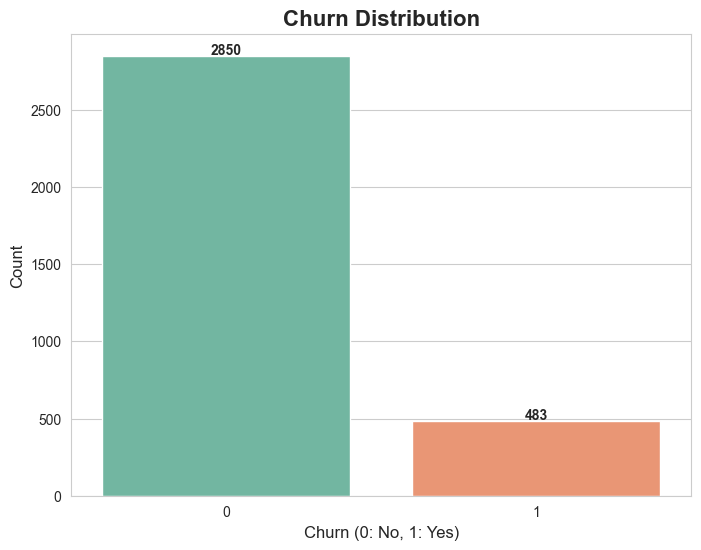

In [6]:
churn_counts = df['churn'].value_counts()
churn_percentages = df['churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"No Churn (0): {churn_counts[0]} ({churn_percentages[0]:.2f}%)")
print(f"Churn (1): {churn_counts[1]} ({churn_percentages[1]:.2f}%)")

# Visualize
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, v in enumerate(churn_counts):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.show()

## 7. Correlation Analysis

Top 10 Features Correlated with Churn:
churn                     1.000000
international_plan        0.259852
total_charge              0.231549
customer_service_calls    0.208750
day_mins                  0.205151
day_charge                0.205151
evening_mins              0.092796
evening_charge            0.092786
international_charge      0.068259
international_mins        0.068239
night_charge              0.035496
Name: churn, dtype: float64


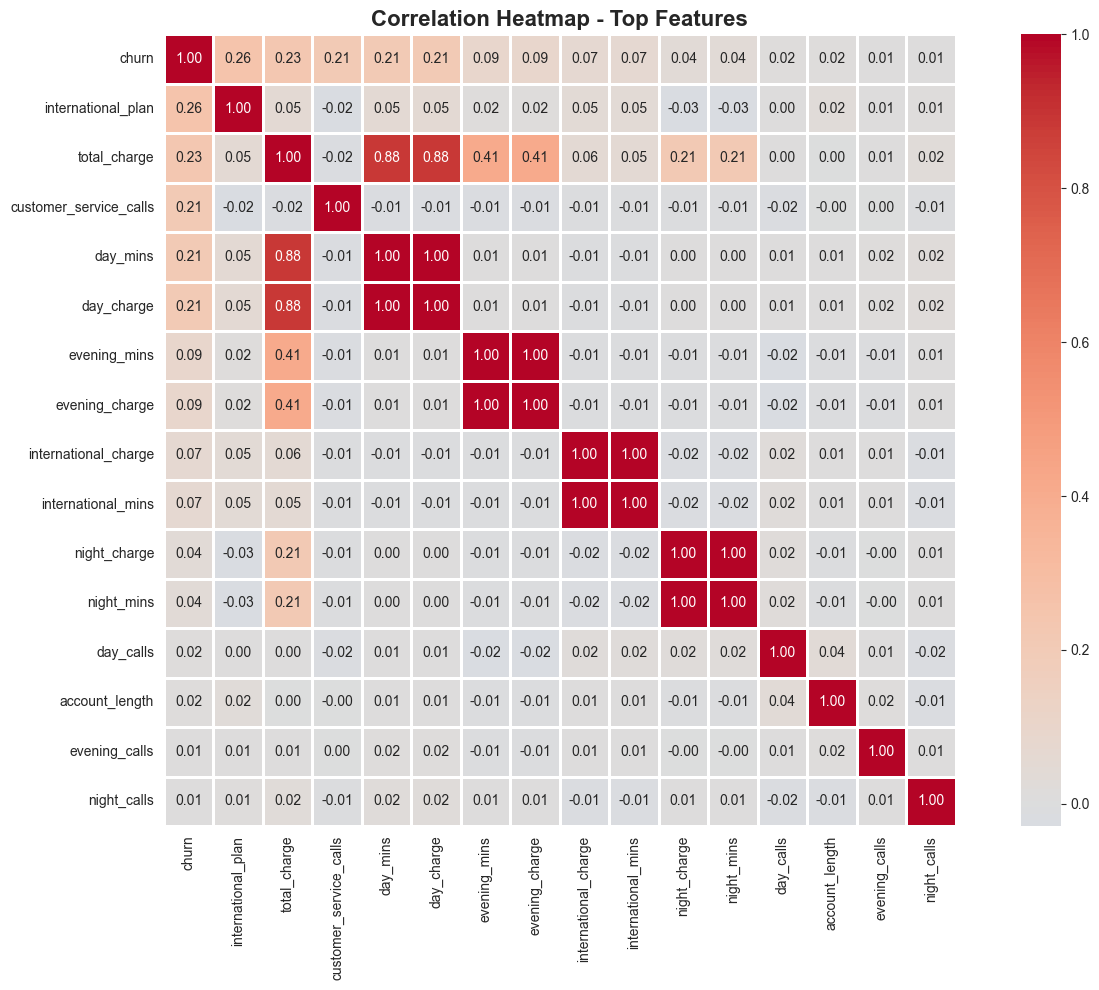

In [7]:
correlations = df.corr()['churn'].sort_values(ascending=False)
print("Top 10 Features Correlated with Churn:")
print(correlations.head(11))

# Correlation heatmap
plt.figure(figsize=(14, 10))
top_features = correlations.head(16).index
corr_subset = df[top_features].corr()
sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Correlation Heatmap - Top Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Feature Analysis - Customer Service Calls

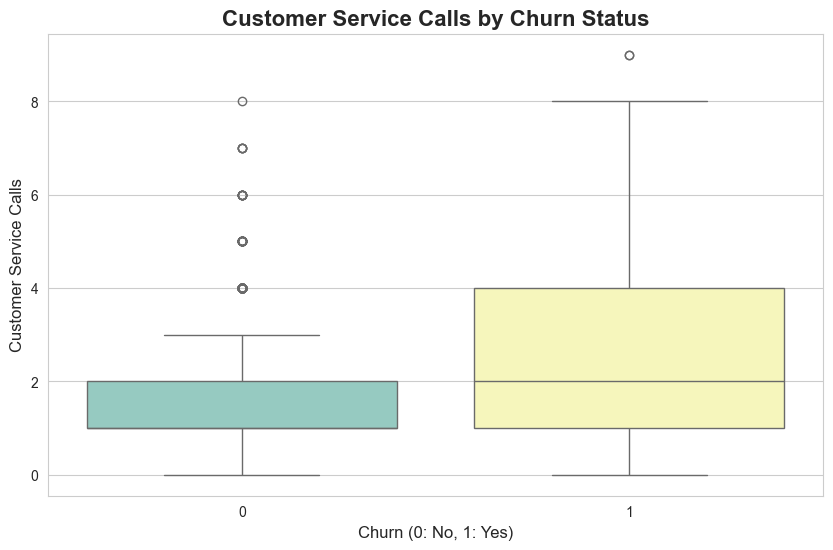

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='churn', y='customer_service_calls', palette='Set3')
plt.title('Customer Service Calls by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Customer Service Calls', fontsize=12)
plt.show()

## 9. Feature Analysis - Plans (International & Voice Mail)

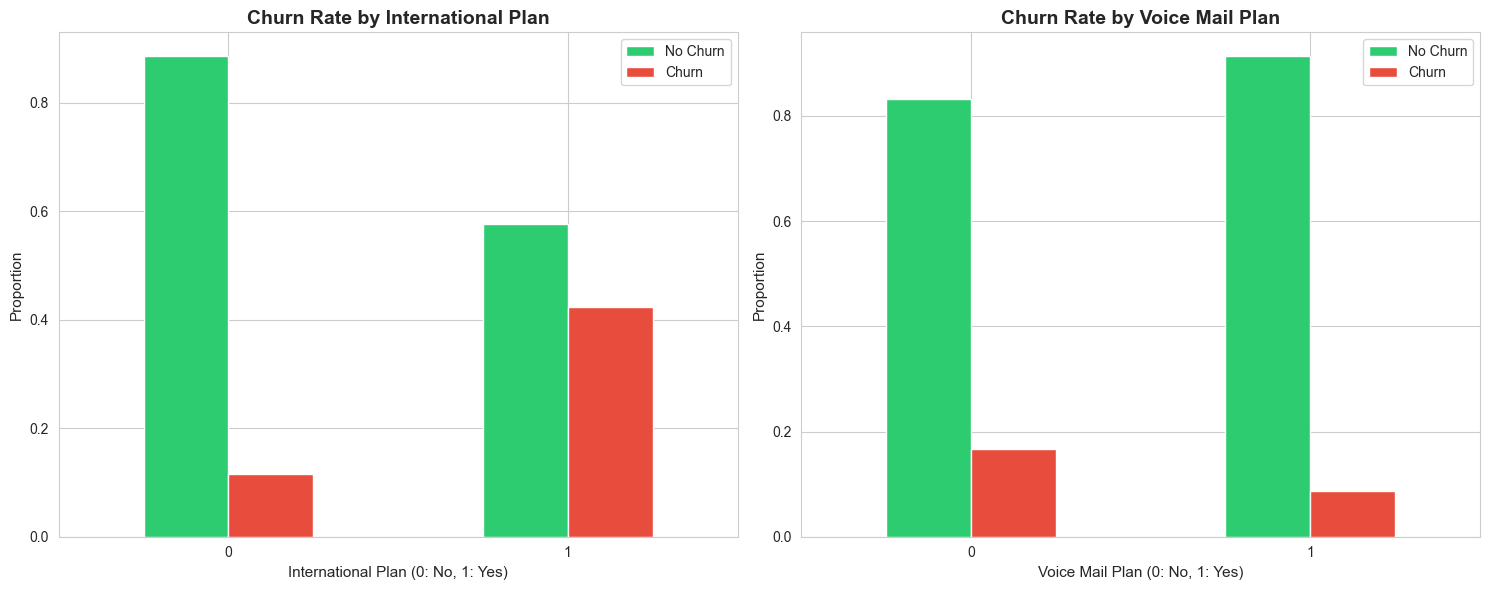

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# International Plan
pd.crosstab(df['international_plan'], df['churn'], normalize='index').plot(
    kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Rate by International Plan', fontsize=14, fontweight='bold')
axes[0].set_xlabel('International Plan (0: No, 1: Yes)', fontsize=11)
axes[0].set_ylabel('Proportion', fontsize=11)
axes[0].legend(['No Churn', 'Churn'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Voice Mail Plan
pd.crosstab(df['voice_mail_plan'], df['churn'], normalize='index').plot(
    kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn Rate by Voice Mail Plan', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Voice Mail Plan (0: No, 1: Yes)', fontsize=11)
axes[1].set_ylabel('Proportion', fontsize=11)
axes[1].legend(['No Churn', 'Churn'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## 10. Usage Patterns - Total Charge & Day Minutes

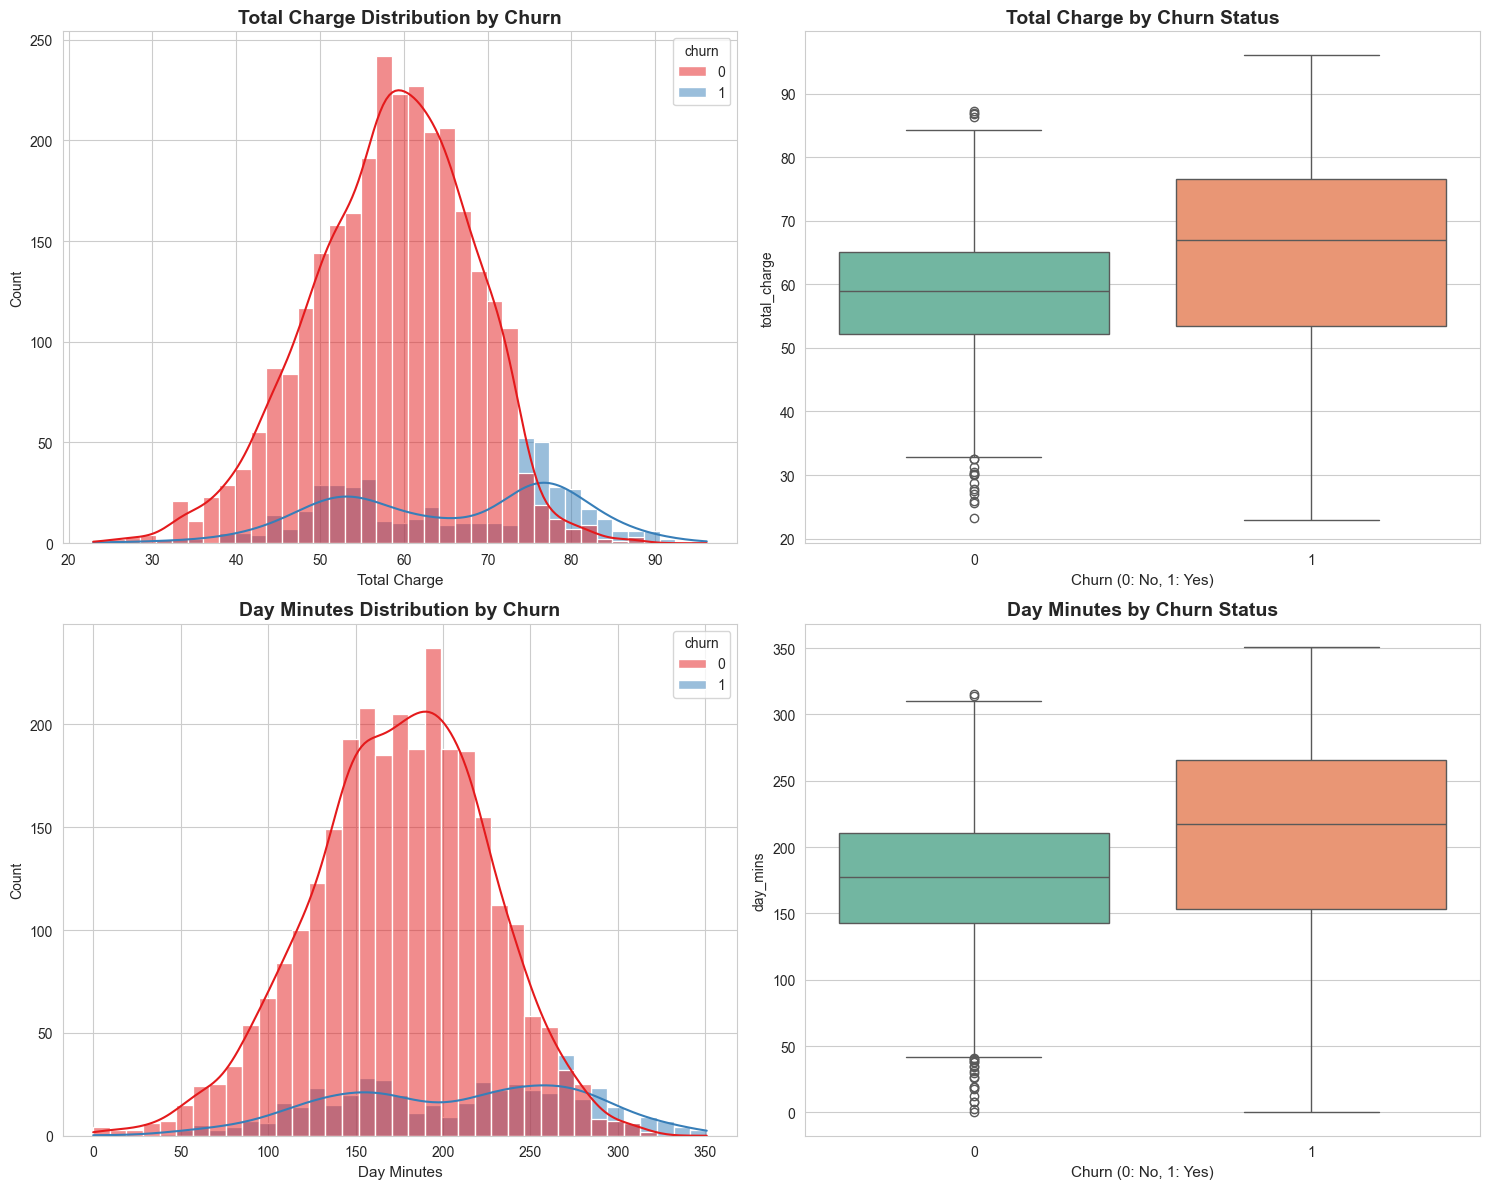

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Total Charge - Distribution
sns.histplot(data=df, x='total_charge', hue='churn', kde=True, palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Total Charge Distribution by Churn', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Charge', fontsize=11)

# Total Charge - Box Plot
sns.boxplot(data=df, x='churn', y='total_charge', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Total Charge by Churn Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Churn (0: No, 1: Yes)', fontsize=11)

# Day Minutes - Distribution
sns.histplot(data=df, x='day_mins', hue='churn', kde=True, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Day Minutes Distribution by Churn', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Day Minutes', fontsize=11)

# Day Minutes - Box Plot
sns.boxplot(data=df, x='churn', y='day_mins', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Day Minutes by Churn Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Churn (0: No, 1: Yes)', fontsize=11)

plt.tight_layout()
plt.show()

## 11. Summary Statistics by Churn Status

In [11]:
print("Mean values by churn status:")
df.groupby('churn').mean()

Mean values by churn status:


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
churn,,,,,,,,,,,,,,,,,,
0,100.793684,0.295439,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,0.065263,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,58.448807
1,102.664596,0.165631,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,0.283644,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,65.355963


## 12. Key Findings

### Summary of EDA Insights:

1. **Dataset Overview**: 1000 customers with 19 features
2. **Data Quality**: No missing values ✓
3. **Class Balance**: Check churn distribution for potential imbalance
4. **Top Predictors**:
   - Customer service calls (higher calls → higher churn)
   - International plan (customers with international plan churn more)
   - Total charge and usage patterns
   - Day minutes usage

### Next Steps:
- Feature engineering and selection
- Handle class imbalance if needed
- Build and evaluate machine learning models
- Implement churn prediction system